# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt


## Load data

In [2]:
 #Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv') 
internet = pd.read_csv('/datasets/megaline_internet.csv') 
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv') 
users = pd.read_csv('/datasets/megaline_users.csv')



## Prepare the data

In [3]:
#calls.head()
#calls.info()
# After initial observations, the call_date field in the calls dataframe needs to be converted over to a datetime data type.
# Seems that there are no missing values.
#internet.head()
#internet.info()
# After initial observations, the session_date field in the internet dataframe needs to be converted over to a datetime data type.
# Seems that there are no missing values.
#messages.head(20)
#messages.info()
# After initial observations, the message_date field in the messages dataframe needs to be converted over to a datetime data type.
# Seems that there are no missing values.
# Checked the first 20 rows instead of the default values because it seemed, at first, the values in the user_id column had duplicates. However, that's not the case.
#plans.head()
#plans.info()
# plans dataframe appears as expected. From a glance, everythings seems on track .
users. head()
users.info()
# After initial observations, the reg_date and churn_date field in the users dataframe needs to be converted over to a datetime data type.
# Seems that there some missing values in the churn_date field.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Plans

In [4]:
# Print the general/summary information about the plans' DataFrame
plans.info()
plans.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [5]:
# Print a sample of data for plans
plans.sample(2)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


## Enrich data

In the plans dataframe, even though there is really nothing wrong with this dataframe, I think it would be beneficials to convert the mb_per_month_included field to gbs because that's how megaline tracks the data storage within each phone plan.

In [6]:
plans['mb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans['mb_per_month_included'] 
plans = plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'})  # Rename columns

## Users

In [7]:
# Print the general/summary information about the users' DataFrame
users.info()
users.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [8]:
# Print a sample of data for users
users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
85,1085,Ignacio,Bennett,48,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-07-19,ultimate,NaN
137,1137,Allegra,Hopkins,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-10-02,surf,NaN
213,1213,Carl,Newman,47,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-11-25,ultimate,NaN
140,1140,Randolph,Graves,53,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-26,surf,NaN
87,1087,Lenard,Atkinson,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-18,surf,NaN
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaN
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaN
350,1350,Al,Rasmussen,29,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-09,surf,NaN
297,1297,Nicky,Tucker,51,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-25,surf,NaN
347,1347,Trey,Lynch,65,"Charleston-North Charleston, SC MSA",2018-06-17,ultimate,NaN


Based from the information that was produced from using the .info(), .describe(), .sample() methods, there seems to be missing data in the churn date field and both the reg_date and churn_date fields need to be converted into datetime data types. For the missing values, I can just convert the missing values over because it was stated that the missing values within the churn_date field indicates a plan still be used . For the datetime conversion, I can use the to_datetime() method. 


### Fix Data

#### Handling Missing Values

In [9]:
# 
users['churn_date'] = users['churn_date'].fillna(value='0000-01-01')  # Fill missing values
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Enrich Data

#### Convert "reg_date" and "churn_date" fields to datetime data type

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')
users.info()
users.head()
users.duplicated().sum()  # Count of duplicate rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


0

## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame
calls.info()
calls.describe()
calls.duplicated().sum()  # Count of duplicate rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


0

In [12]:
# Print a sample of data for calls
calls.sample(10)


,id,user_id,call_date,duration
96959,1346_185,1346,2018-10-29,5.18
2957,1010_579,1010,2018-10-27,8.66
80203,1289_18,1289,2018-11-13,0.00
99332,1356_73,1356,2018-11-05,7.54
86257,1318_123,1318,2018-10-21,3.02
98146,1352_526,1352,2018-10-14,1.69
124015,1438_63,1438,2018-10-21,9.92
50538,1182_117,1182,2018-10-19,7.61
32266,1122_104,1122,2018-09-06,12.44
42178,1155_131,1155,2018-07-09,4.21


Based from the information that was produced using the .info(), .describe(), .sample() methods, the "call_date" field needs to be converted to a datetime data type. Given that the time for each call is rounded up despite it being  a second over, it would be best to reflect that in this dataframe.


### Fix data

#### Convert "call_date" field into datetime data type

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

#### Round "duration" field up to the nearest integer

In [14]:
calls['duration'] = np.ceil(calls['duration'])
calls.sample(10)

,id,user_id,call_date,duration
95782,1340_132,1340,2018-11-03,4.0
13506,1057_385,1057,2018-12-09,7.0
121269,1426_57,1426,2018-12-25,4.0
119570,1417_70,1417,2018-09-08,0.0
119019,1415_67,1415,2018-10-23,25.0
37201,1141_45,1141,2018-10-27,4.0
101697,1362_450,1362,2018-06-11,13.0
76674,1273_393,1273,2018-11-25,9.0
127484,1456_394,1456,2018-07-29,0.0
5016,1022_282,1022,2018-09-02,9.0


## Messages

In [15]:
# Print the general/summary information about the messages' DataFrame
messages.info()
messages.describe()
messages.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


0

In [16]:
# Print a sample of data for messages
messages.sample(10)


,id,user_id,message_date
24224,1145_79,1145,2018-11-21
10822,1077_93,1077,2018-12-08
18765,1121_92,1121,2018-12-09
26760,1164_10,1164,2018-08-08
15614,1102_23,1102,2018-12-24
9542,1069_725,1069,2018-10-28
10858,1077_129,1077,2018-11-13
50931,1331_106,1331,2018-09-21
45716,1312_200,1312,2018-05-12
3745,1038_98,1038,2018-12-22


Based from the information that was produced using the .info(), .describe(), .sample() methods, the "message_date" field needs to be converted to a datetime data type. Everything is as expected in this dataframe.

### Fix data

#### Convert "message_date" field into datetime data type

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

## Internet

In [18]:
# Print the general/summary information about the internet DataFrame
internet.info()
internet.describe()
internet.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


0

In [19]:
# Print a sample of data for the internet traffic
internet.sample(10)


,id,user_id,session_date,mb_used
27513,1127_202,1127,2018-12-03,901.57
98117,1462_90,1462,2018-11-23,0.00
65387,1301_77,1301,2018-12-23,296.36
24905,1114_288,1114,2018-12-01,621.16
12040,1059_144,1059,2018-12-15,0.00
66907,1312_130,1312,2018-04-28,147.54
88829,1409_91,1409,2018-11-18,677.54
27489,1127_167,1127,2018-08-01,332.32
95548,1445_196,1445,2018-06-11,174.85
85228,1397_591,1397,2018-12-06,335.41


Based from the information that was produced using the .info(), .describe(), .sample() methods, the "session_date" field needs to be converted to a datetime data type. Everything is as expected in this dataframe. If web sessions were categorized on a monthly basis instead on by individual dates, it would make sense to convert the units from mb to gb sense that's what the company does. However, I think it would be best to leave those units as is until I group the dataframe by month.


### Fix data

#### Convert "session_date" field into datetime data type

In [20]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


## Study plan conditions

In [21]:
# Print out the plan conditions and make sure they are clear for you
plans


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

In [22]:
# Calculate the number of calls made by each user per month. Save the result.
# Group by 'user_id' and 'call_date', then count the number of calls
calls_per_user_per_month = calls.groupby(['user_id', calls['call_date'].dt.to_period('M')]).size()

# Reset index if you want it back as a DataFrame
calls_per_user_per_month = calls_per_user_per_month.reset_index(name='num_calls')
calls_per_user_per_month

,user_id,call_date,num_calls
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [23]:
# Calculate the amount of minutes spent by each user per month. Save the result.
# Group by 'user_id' and 'duration', then count the number of calls
mins_per_user_per_month = calls.groupby(['user_id', calls['call_date'].dt.to_period('M')])['duration'].sum()

# Reset index if you want it back as a DataFrame
mins_per_user_per_month = mins_per_user_per_month.reset_index(name='sum_min')
mins_per_user_per_month



,user_id,call_date,sum_min
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


In [24]:
# Calculate the number of messages sent by each user per month. Save the result.
# Calculate the number of messages sent by each user per month
sms_per_user_per_month = messages.groupby(['user_id', messages['message_date'].dt.to_period('M')]).size()

# Reset index and rename the column
sms_per_user_per_month = sms_per_user_per_month.reset_index(name='num_mess')

sms_per_user_per_month

,user_id,message_date,num_mess
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [25]:
# Calculate the volume of internet traffic used by each user per month. Save the result

# Group by 'user_id' and month extracted from 'session_date'
vol_per_user_per_month = internet.groupby(['user_id', internet['session_date'].dt.to_period('M')])['mb_used'].sum()

# Reset index to get it back as a DataFrame
vol_per_user_per_month = vol_per_user_per_month.reset_index(name='total_mb_used')

# Since the dataframe is grouped by month, it would be smart to convert from mb to gb now
vol_per_user_per_month['total_mb_used'] = vol_per_user_per_month['total_mb_used'] / 1024

vol_per_user_per_month = vol_per_user_per_month.rename(columns={'total_mb_used': 'total_gb_used'})  # Rename columns

vol_per_user_per_month['total_gb_used'] = np.ceil(vol_per_user_per_month['total_gb_used']) #Round gbs up

vol_per_user_per_month


,user_id,session_date,total_gb_used
0,1000,2018-12,2.0
1,1001,2018-08,7.0
2,1001,2018-09,14.0
3,1001,2018-10,22.0
4,1001,2018-11,19.0
...,...,...,...
2272,1498,2018-12,23.0
2273,1499,2018-09,13.0
2274,1499,2018-10,20.0
2275,1499,2018-11,17.0


In [26]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
mass_phone_info = calls_per_user_per_month.merge(mins_per_user_per_month, on=['user_id', 'call_date'])
mass_phone_info = mass_phone_info.merge(sms_per_user_per_month, left_on=['user_id', 'call_date'], right_on=['user_id', 'message_date'], how='left')
mass_phone_info = mass_phone_info.merge(vol_per_user_per_month, left_on=['user_id', 'call_date'], right_on=['user_id', 'session_date'], how='left')
mass_phone_info

,user_id,call_date,num_calls,sum_min,message_date,num_mess,session_date,total_gb_used
0,1000,2018-12,16,124.0,2018-12,11.0,2018-12,2.0
1,1001,2018-08,27,182.0,2018-08,30.0,2018-08,7.0
2,1001,2018-09,49,315.0,2018-09,44.0,2018-09,14.0
3,1001,2018-10,65,393.0,2018-10,53.0,2018-10,22.0
4,1001,2018-11,64,426.0,2018-11,36.0,2018-11,19.0
...,...,...,...,...,...,...,...,...
2253,1498,2018-12,39,339.0,NaT,NaN,2018-12,23.0
2254,1499,2018-09,41,346.0,NaT,NaN,2018-09,13.0
2255,1499,2018-10,53,385.0,NaT,NaN,2018-10,20.0
2256,1499,2018-11,45,308.0,NaT,NaN,2018-11,17.0


In [27]:
# Add the plan information
phone_plan_info = users.merge(plans, left_on=['plan'], right_on=['plan_name'], how='left')
phone_plan_info['reg_date'] = phone_plan_info['reg_date'].dt.strftime('%Y-%m')
phone_plan_info['churn_date'] = phone_plan_info['churn_date'].dt.strftime('%Y-%m')
phone_plan_info = phone_plan_info.drop(columns='plan_name')  # Drop specific columns
mass_phone_info = mass_phone_info.merge(phone_plan_info, on='user_id', how='left')
mass_phone_info.sample(10)


,user_id,call_date,num_calls,sum_min,message_date,num_mess,session_date,total_gb_used,first_name,last_name,...,reg_date,plan,churn_date,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
1709,1374,2018-10,36,255.0,2018-10,80.0,2018-10,30.0,Ching,Watts,...,2018-02,surf,NaN,50,15.0,500,20,10,0.03,0.03
883,1188,2018-09,24,169.0,2018-09,32.0,2018-09,9.0,Ethelene,Brock,...,2018-01,ultimate,NaN,1000,30.0,3000,70,7,0.01,0.01
2123,1468,2018-09,49,418.0,2018-09,26.0,2018-09,11.0,Johana,Kim,...,2018-09,surf,NaN,50,15.0,500,20,10,0.03,0.03
2208,1490,2018-12,50,368.0,NaT,NaN,2018-12,46.0,Shane,Cortez,...,2018-01,ultimate,NaN,1000,30.0,3000,70,7,0.01,0.01
187,1046,2018-11,72,421.0,2018-11,31.0,2018-11,25.0,Beata,Hooper,...,2018-02,surf,NaN,50,15.0,500,20,10,0.03,0.03
661,1144,2018-06,73,478.0,2018-06,64.0,2018-06,26.0,Kaycee,Peterson,...,2018-04,ultimate,NaN,1000,30.0,3000,70,7,0.01,0.01
1196,1258,2018-12,16,133.0,2018-12,49.0,2018-12,24.0,Kai,Russell,...,2018-07,surf,NaN,50,15.0,500,20,10,0.03,0.03
1835,1401,2018-11,107,685.0,2018-11,53.0,2018-11,8.0,Charmain,Bryant,...,2018-08,ultimate,NaN,1000,30.0,3000,70,7,0.01,0.01
527,1113,2018-09,67,496.0,2018-09,31.0,2018-09,12.0,Spencer,Powers,...,2018-06,ultimate,NaN,1000,30.0,3000,70,7,0.01,0.01
1492,1331,2018-10,44,299.0,2018-10,85.0,2018-10,16.0,Lashandra,Ramos,...,2018-02,surf,NaN,50,15.0,500,20,10,0.03,0.03


In [28]:
# Calculate the monthly revenue for each user

mass_phone_info['min_diff'] = mass_phone_info['minutes_included'] - mass_phone_info['sum_min']
mass_phone_info['sms_diff'] = mass_phone_info['messages_included'] - mass_phone_info['num_mess']
mass_phone_info['data_diff'] = mass_phone_info['gb_per_month_included'] - mass_phone_info['total_gb_used']
surf_users = mass_phone_info.loc[mass_phone_info['plan'] == 'surf']
ultimate_users = mass_phone_info.loc[mass_phone_info['plan'] == 'ultimate']
surf_users
# Define costs per unit over the limit for each plan
surf_costs = {'minute': 0.03, 'text': 0.03, 'gb': 10, 'monthly': 20}
ultimate_costs = {'minute': 0.01, 'text': 0.01, 'gb': 7, 'monthly': 70}

# Function to compute revenue for a given plan
def calculate_plan_revenue(row, costs):
    revenue = costs['monthly']
    if row['min_diff'] < 0:
        revenue += abs(row['min_diff']) * costs['minute']
    if row['sms_diff'] < 0:
        revenue += abs(row['sms_diff']) * costs['text']
    if row['data_diff'] < 0:
        revenue += abs(row['data_diff']) * costs['gb']
    return revenue

# Calculate revenue for Surf
surf_users.loc[:, 'monthly_revenue'] = surf_users.apply(calculate_plan_revenue, axis=1, costs=surf_costs)

# Calculate revenue for Ultimate
ultimate_users.loc[:, 'monthly_revenue'] = ultimate_users.apply(calculate_plan_revenue, axis=1, costs=ultimate_costs)

print(surf_users[['user_id', 'monthly_revenue']])
print(ultimate_users[['user_id', 'monthly_revenue']])

      user_id  monthly_revenue
1        1001            20.00
2        1001            20.00
3        1001            90.09
4        1001            60.00
5        1001            60.00
...       ...              ...
2253     1498           100.00
2254     1499            20.00
2255     1499            70.00
2256     1499            40.00
2257     1499            90.00

[1545 rows x 2 columns]
      user_id  monthly_revenue
0        1000             70.0
19       1006             70.0
20       1006             84.0
26       1008             70.0
27       1008             70.0
...       ...              ...
2223     1493             70.0
2224     1493             70.0
2225     1493             70.0
2226     1493             70.0
2242     1497             70.0

[713 rows x 2 columns]


/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Study user behaviour

### Calls

call_date
2018-01    203.000000
2018-02    297.000000
2018-03    330.000000
2018-04    351.540000
2018-05    410.240000
2018-06    435.791667
2018-07    453.733333
2018-08    417.849057
2018-09    420.732984
2018-10    438.991379
2018-11    432.494585
2018-12    484.501608
Freq: M, Name: sum_min, dtype: float64
call_date
2018-01    193.500000
2018-02    470.333333
2018-03    304.250000
2018-04    336.857143
2018-05    406.241379
2018-06    387.444444
2018-07    427.067797
2018-08    421.436620
2018-09    437.511628
2018-10    455.028571
2018-11    448.730159
2018-12    465.261745
Freq: M, Name: sum_min, dtype: float64


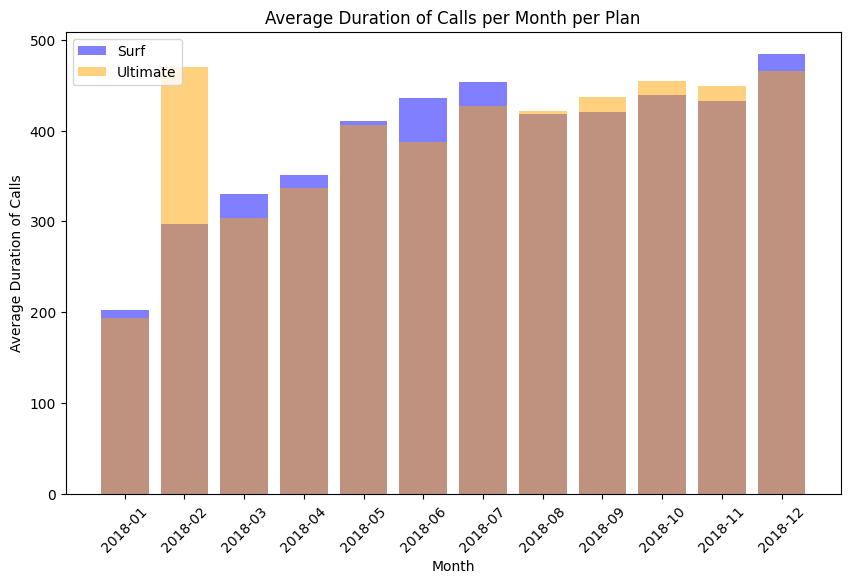

In [29]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
# I used the print statement because I noticed that it allowed me to display both series side by side.
print(surf_users.groupby('call_date')['sum_min'].mean())
print(ultimate_users.groupby('call_date')['sum_min'].mean())

# Filter by day
surf_mean_dur = surf_users.groupby('call_date')['sum_min'].mean()
ult_mean_dur = ultimate_users.groupby('call_date')['sum_min'].mean()

plt.figure(figsize=(10, 6))

# Convert index to string to get proper x-ticks
months = surf_mean_dur.index.astype(str)

# Bar plot for Surf
plt.bar(months, surf_mean_dur, alpha=0.5, label='Surf', color='blue')
# Bar plot for Ultimate
plt.bar(months, ult_mean_dur, alpha=0.5, label='Ultimate', color='orange')

plt.title('Average Duration of Calls per Month per Plan')
plt.xlabel('Month')
plt.ylabel('Average Duration of Calls')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Looking at the graph, it seems that the average duration of calls per plan fluctuate through out the year. For example, the first part of the year, except February, seems to be dominated by users on the Surf plan while a section of the latter part of the year is owned by users on the Ultimate plan.

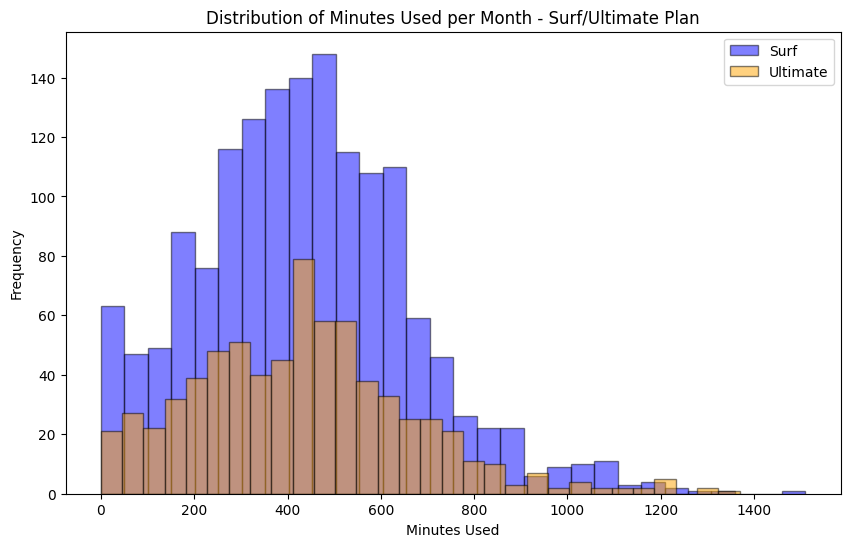

In [30]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

plt.figure(figsize=(10, 6))

# Plot histogram for surf_users
plt.hist(surf_users['sum_min'], bins=30, alpha=0.5, label='Surf', color='blue', edgecolor='black')
plt.hist(ultimate_users['sum_min'],bins=30, alpha=0.5, label='Ultimate', color='orange', edgecolor='black')
plt.title('Distribution of Minutes Used per Month - Surf/Ultimate Plan')
plt.xlabel('Minutes Used')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Observing the histogram, on a general level, it looks like a higher share of Surf users utilize their minutes within their plan than Ultimate users.

In [31]:
# Calculate the mean and the variance of the monthly call duration
mean_surf_dur = surf_users['sum_min'].mean()
var_surf_dur = np.var(surf_users['sum_min'])
mean_ult_dur = ultimate_users['sum_min'].mean()
var_ult_dur = np.var(ultimate_users['sum_min'])

print('Surf Users:')
print('mean:', mean_surf_dur)
print('variance:', var_surf_dur)
print('')
print('Ultimate Users:')
print('mean:', mean_ult_dur)
print('variance:', var_ult_dur)

Surf Users:
mean: 436.51974110032364
variance: 52537.03666530514

Ultimate Users:
mean: 434.67601683029454
variance: 56494.286339253566


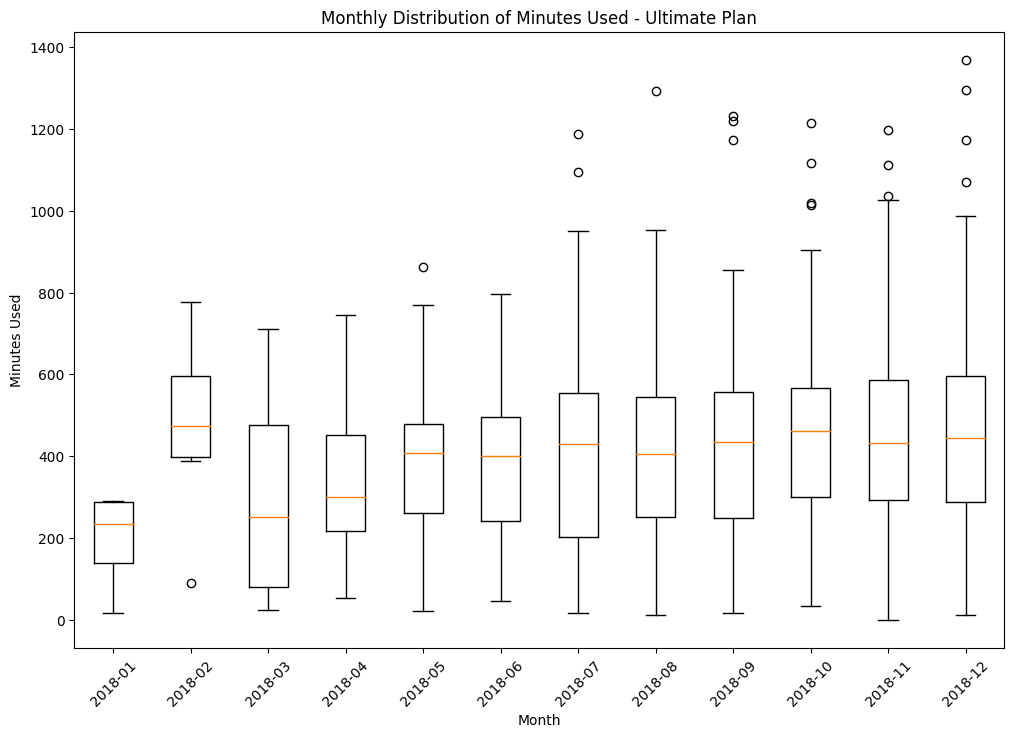

In [32]:
ultimate_users = ultimate_users.copy()

# Convert call dates back to timestamps
ultimate_users['call_date'] = ultimate_users['call_date'].dt.to_timestamp()

# Convert and ensure 'call_date' is in proper format
ultimate_users['call_date'] = pd.to_datetime(ultimate_users['call_date'])
ultimate_users['month'] = ultimate_users['call_date'].dt.to_period('M')

# Filter out any NaT or non-applicable values
ultimate_users = ultimate_users.dropna(subset=['month'])

# Prepare data for each month, ensuring order
months = sorted(ultimate_users['month'].unique())
monthly_data = [ultimate_users[ultimate_users['month'] == month]['sum_min'] for month in months]

plt.figure(figsize=(12, 8))

# Create the boxplot
plt.boxplot(monthly_data, labels=[str(month) for month in months])
plt.title('Monthly Distribution of Minutes Used - Ultimate Plan')
plt.xlabel('Month')
plt.ylabel('Minutes Used')
plt.xticks(rotation=45)
plt.show()


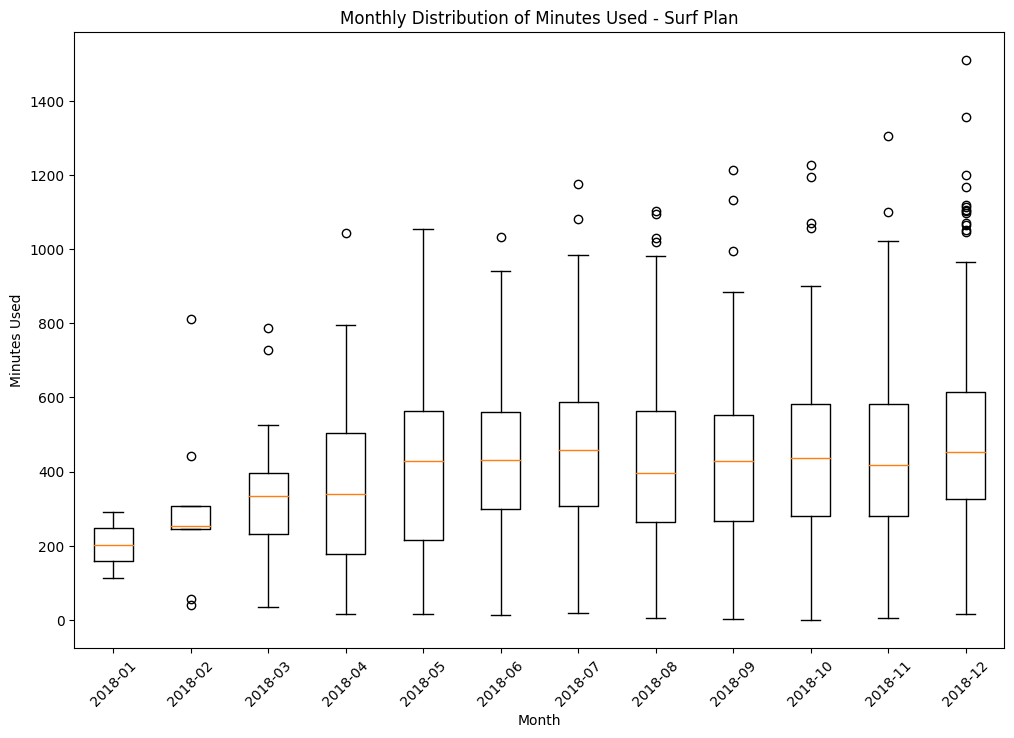

In [33]:
surf_users = surf_users.copy()

# Convert call dates back to timestamps
surf_users['call_date'] = surf_users['call_date'].dt.to_timestamp()

# Convert and ensure 'call_date' is in proper format
surf_users['call_date'] = pd.to_datetime(surf_users['call_date'])
surf_users['month'] = surf_users['call_date'].dt.to_period('M')

# Filter out any NaT or non-applicable values
surf_users = surf_users.dropna(subset=['month'])

# Prepare data for each month, ensuring order
months = sorted(surf_users['month'].unique())
monthly_data = [surf_users[surf_users['month'] == month]['sum_min'] for month in months]

plt.figure(figsize=(12, 8))

# Create the boxplot
plt.boxplot(monthly_data, labels=[str(month) for month in months])
plt.title('Monthly Distribution of Minutes Used - Surf Plan')
plt.xlabel('Month')
plt.ylabel('Minutes Used')
plt.xticks(rotation=45)
plt.show()



Based from the previous graph, it looks like the users on the Surf plan tend to have a higher duration in terms of calls than the users on the Ultimate plan but this is just a small difference.

### Messages

Surf plan: message_date
2018-01       21.0
2018-02      108.0
2018-03      351.0
2018-04      870.0
2018-05     1829.0
2018-06     2427.0
2018-07     3243.0
2018-08     4588.0
2018-09     5802.0
2018-10     7718.0
2018-11     8896.0
2018-12    11884.0
Freq: M, Name: num_mess, dtype: float64
Ultimate plan: message_date
2018-01      62.0
2018-02     139.0
2018-03     243.0
2018-04     463.0
2018-05     931.0
2018-06    1374.0
2018-07    1937.0
2018-08    2732.0
2018-09    3259.0
2018-10    4179.0
2018-11    4861.0
2018-12    6718.0
Freq: M, Name: num_mess, dtype: float64


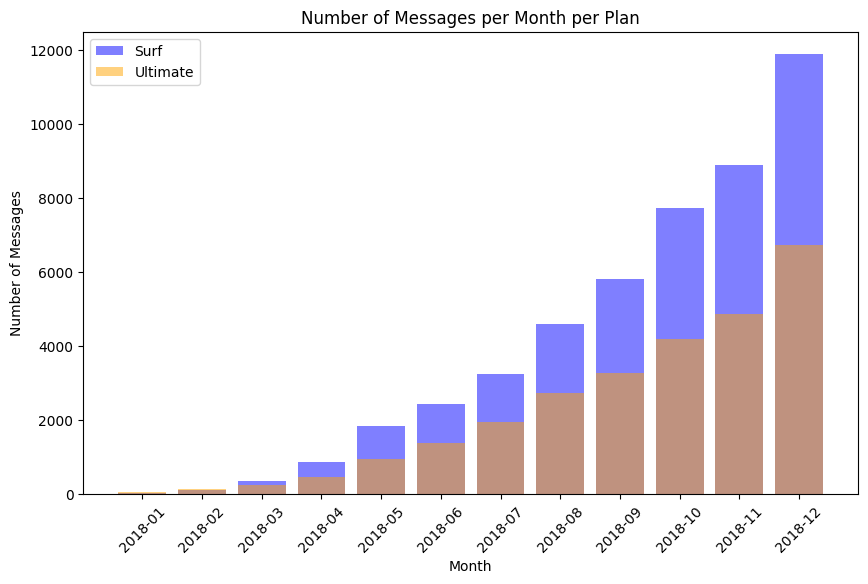

In [34]:
# Compare the number of messages users of each plan tend to send each month. Create a bar chart for visualization.

# Group by month and count messages
surf_monthly_messages = surf_users.groupby('message_date')['num_mess'].sum()
ultimate_monthly_messages = ultimate_users.groupby('message_date')['num_mess'].sum()

print('Surf plan:', surf_monthly_messages)
print('Ultimate plan:', ultimate_monthly_messages)

# Filter by day
surf_monthly_messages = surf_users.groupby('message_date')['num_mess'].sum()
ultimate_monthly_messages = ultimate_users.groupby('message_date')['num_mess'].sum()

plt.figure(figsize=(10, 6))

# Convert index to string to get proper x-ticks
months = surf_monthly_messages.index.astype(str)

# Bar plot for Surf
plt.bar(months, surf_monthly_messages, alpha=0.5, label='Surf', color='blue')
# Bar plot for Ultimate
plt.bar(months, ultimate_monthly_messages, alpha=0.5, label='Ultimate', color='orange')

plt.title('Number of Messages per Month per Plan')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)
plt.legend()
plt.show()

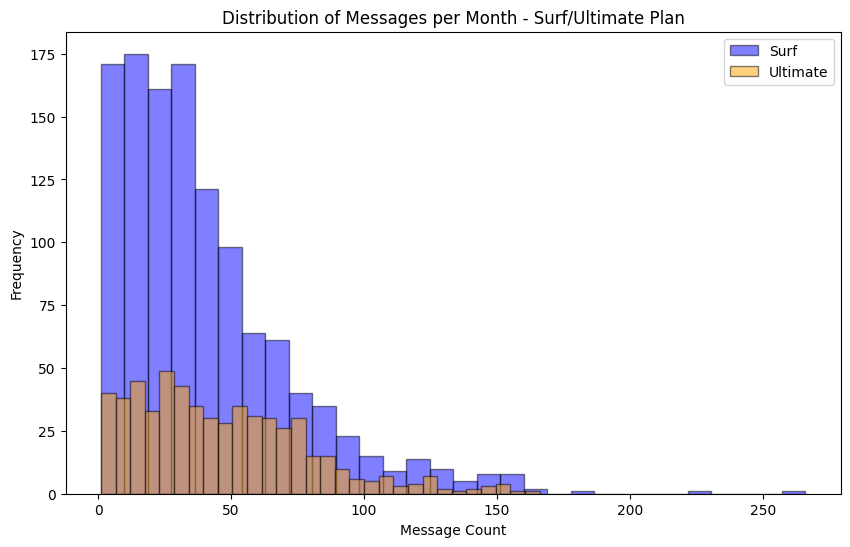

In [35]:
# Compare the number of messages users of each plan require each month. Plot a histogram.

plt.figure(figsize=(10, 6))

# Plot histogram for surf_users
plt.hist(surf_users['num_mess'], bins=30, alpha=0.5, label='Surf', color='blue', edgecolor='black')
plt.hist(ultimate_users['num_mess'],bins=30, alpha=0.5, label='Ultimate', color='orange', edgecolor='black')
plt.title('Distribution of Messages per Month - Surf/Ultimate Plan')
plt.xlabel('Message Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()




In [36]:
# Calculate the mean and the variance of the monthly call duration
mean_surf_mess = surf_users['num_mess'].mean()
var_surf_mess = np.var(surf_users['num_mess'])
mean_ult_mess = ultimate_users['num_mess'].mean()
var_ult_mess = np.var(ultimate_users['num_mess'])

print('Surf Users:')
print('mean:', mean_surf_mess)
print('variance:', var_surf_mess)
print('')
print('Ultimate Users:')
print('mean:', mean_ult_mess)
print('variance:', var_ult_mess)

Surf Users:
mean: 39.98073701842546
variance: 1100.6152068269882

Ultimate Users:
mean: 46.4559585492228
variance: 1082.5209446338606


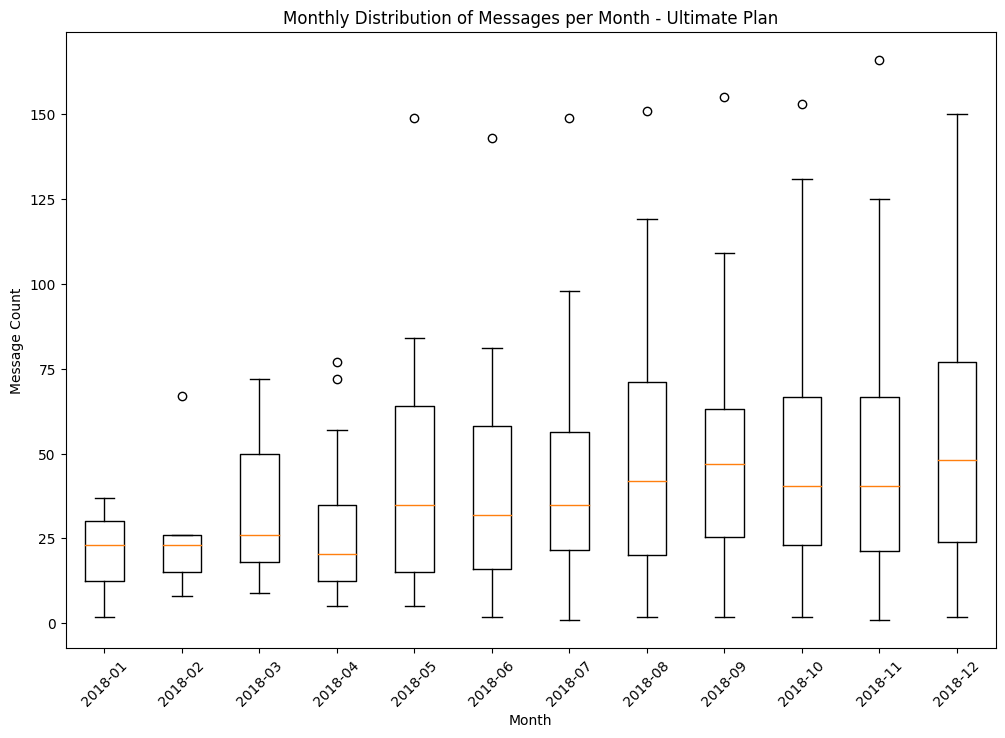

In [37]:
ultimate_users = ultimate_users.copy()

# Convert message dates back to timestamps
ultimate_users['message_date'] = ultimate_users['message_date'].dt.to_timestamp()


# Convert and ensure 'message_date' is in proper format
ultimate_users['message_date'] = pd.to_datetime(ultimate_users['message_date'])
ultimate_users['month'] = ultimate_users['message_date'].dt.to_period('M')

# Filter out any NaT or non-applicable values
ultimate_users = ultimate_users.dropna(subset=['month'])

# Prepare data for each month, ensuring order
months = sorted(ultimate_users['month'].unique())
monthly_data = [ultimate_users[ultimate_users['month'] == month]['num_mess'] for month in months]

plt.figure(figsize=(12, 8))

# Create the boxplot
plt.boxplot(monthly_data, labels=[str(month) for month in months])

plt.title('Monthly Distribution of Messages per Month - Ultimate Plan')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.show()

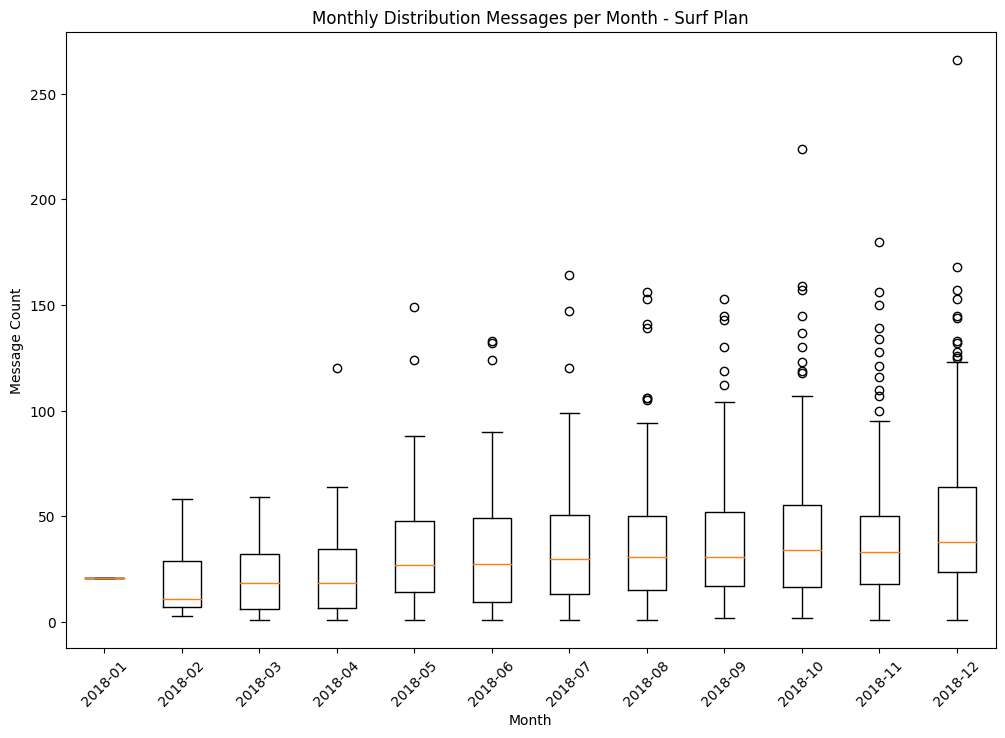

In [38]:
surf_users = surf_users.copy()

# Convert message dates back to timestamps
surf_users['message_date'] = surf_users['message_date'].dt.to_timestamp()

# Convert and ensure 'message_date' is in proper format
surf_users['message_date'] = pd.to_datetime(surf_users['message_date'])
surf_users['month'] = surf_users['message_date'].dt.to_period('M')

# Filter out any NaT or non-applicable values
surf_users = surf_users.dropna(subset=['month'])

# Prepare data for each month, ensuring order
months = sorted(surf_users['month'].unique())
monthly_data = [surf_users[surf_users['month'] == month]['num_mess'] for month in months]

plt.figure(figsize=(12, 8))

# Create the boxplot
plt.boxplot(monthly_data, labels=[str(month) for month in months])
plt.title('Monthly Distribution Messages per Month - Surf Plan')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.show()


### Internet

Surf plan: session_date
2018-01       8.0
2018-02      47.0
2018-03     202.0
2018-04     423.0
2018-05     798.0
2018-06    1104.0
2018-07    1496.0
2018-08    2053.0
2018-09    2442.0
2018-10    3172.0
2018-11    3573.0
2018-12    4450.0
Freq: M, Name: total_gb_used, dtype: float64
Ultimate plan: session_date
2018-01      22.0
2018-02      87.0
2018-03     167.0
2018-04     232.0
2018-05     362.0
2018-06     574.0
2018-07     782.0
2018-08    1026.0
2018-09    1169.0
2018-10    1552.0
2018-11    1775.0
2018-12    2294.0
Freq: M, Name: total_gb_used, dtype: float64


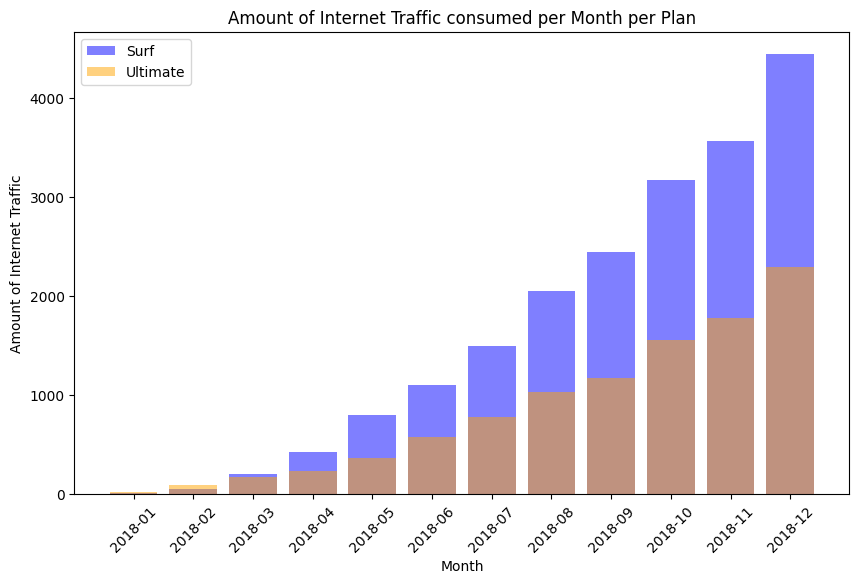

In [39]:
# Compare the amount of internet traffic consumed by users per plan
surf_monthly_sessions = surf_users.groupby('session_date')['total_gb_used'].sum()
ultimate_monthly_sessions = ultimate_users.groupby('session_date')['total_gb_used'].sum()
print('Surf plan:', surf_monthly_sessions)
print('Ultimate plan:', ultimate_monthly_sessions)

# Filter by day
surf_monthly_sessions = surf_users.groupby('session_date')['total_gb_used'].sum()
ultimate_monthly_sessions = ultimate_users.groupby('session_date')['total_gb_used'].sum()
plt.figure(figsize=(10, 6))

# Convert index to string to get proper x-ticks
months = surf_monthly_sessions.index.astype(str)

# Bar plot for Surf
plt.bar(months, surf_monthly_sessions, alpha=0.5, label='Surf', color='blue')
# Bar plot for Ultimate
plt.bar(months, ultimate_monthly_sessions, alpha=0.5, label='Ultimate', color='orange')

plt.title('Amount of Internet Traffic consumed per Month per Plan')
plt.xlabel('Month')
plt.ylabel('Amount of Internet Traffic')
plt.xticks(rotation=45)
plt.legend()
plt.show()

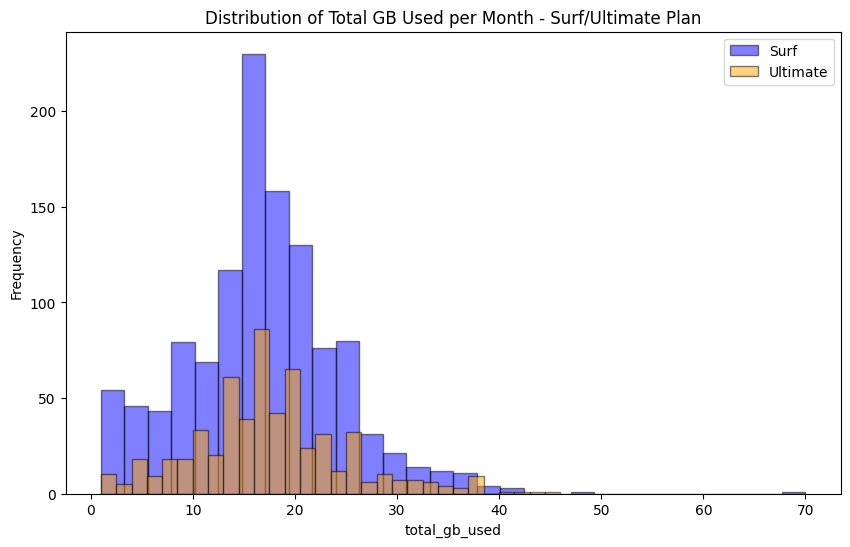

In [40]:
# Compare the number of messages users of each plan require each month. Plot a histogram.

plt.figure(figsize=(10, 6))

# Plot histogram for surf_users
plt.hist(surf_users['total_gb_used'], bins=30, alpha=0.5, label='Surf', color='blue', edgecolor='black')
plt.hist(ultimate_users['total_gb_used'],bins=30, alpha=0.5, label='Ultimate', color='orange', edgecolor='black')
plt.title('Distribution of Total GB Used per Month - Surf/Ultimate Plan')
plt.xlabel('total_gb_used')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [41]:
# Calculate the mean and the variance of the monthly call duration
mean_surf_sess = surf_users['total_gb_used'].mean()
var_surf_sess = np.var(surf_users['total_gb_used'])
mean_ult_sess = ultimate_users['total_gb_used'].mean()
var_ult_sess = np.var(ultimate_users['total_gb_used'])

print('Surf Users:')
print('mean:', mean_surf_sess)
print('variance:', var_surf_sess)
print('')
print('Ultimate Users:')
print('mean:', mean_ult_sess)
print('variance:', var_ult_sess)

Surf Users:
mean: 16.752542372881354
variance: 56.964188451594374

Ultimate Users:
mean: 17.34369602763385
variance: 56.077037116581806


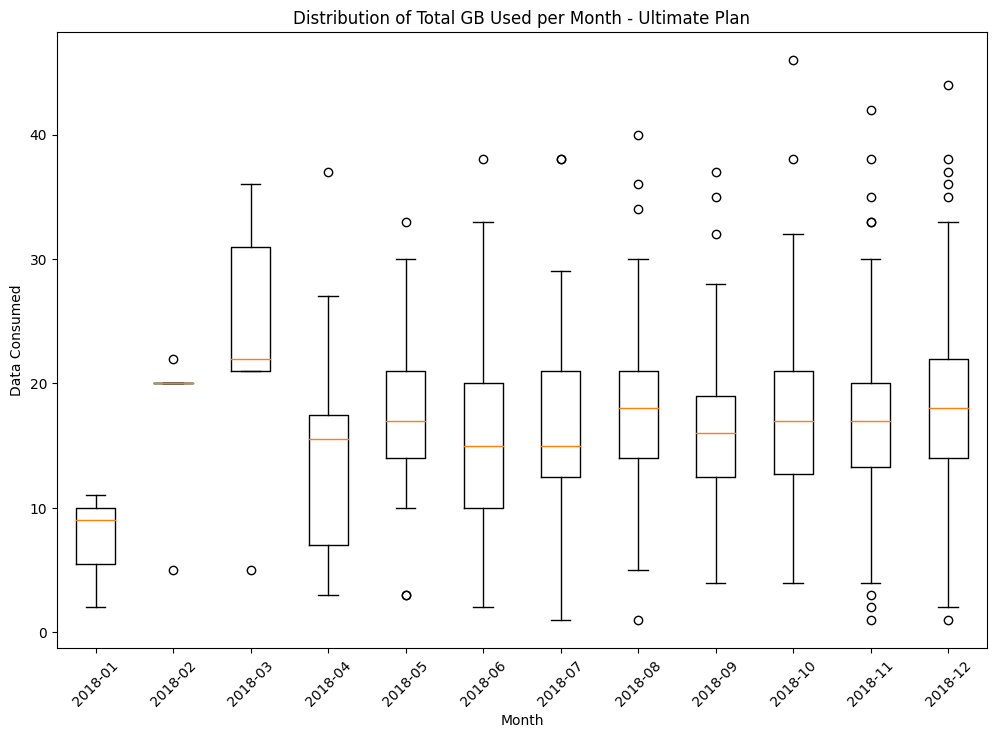

In [42]:
ultimate_users = ultimate_users.copy()

# Convert message dates back to timestamps
ultimate_users['session_date'] = ultimate_users['session_date'].dt.to_timestamp()


# Convert and ensure 'message_date' is in proper format
ultimate_users['session_date'] = pd.to_datetime(ultimate_users['session_date'])
ultimate_users['month'] = ultimate_users['session_date'].dt.to_period('M')

# Filter out any NaT or non-applicable values
ultimate_users = ultimate_users.dropna(subset=['month'])

# Prepare data for each month, ensuring order
months = sorted(ultimate_users['month'].unique())
monthly_data = [ultimate_users[ultimate_users['month'] == month]['total_gb_used'] for month in months]

plt.figure(figsize=(12, 8))

# Create the boxplot
plt.boxplot(monthly_data, labels=[str(month) for month in months])

plt.title('Distribution of Total GB Used per Month - Ultimate Plan')
plt.xlabel('Month')
plt.ylabel('Data Consumed')
plt.xticks(rotation=45)
plt.show()

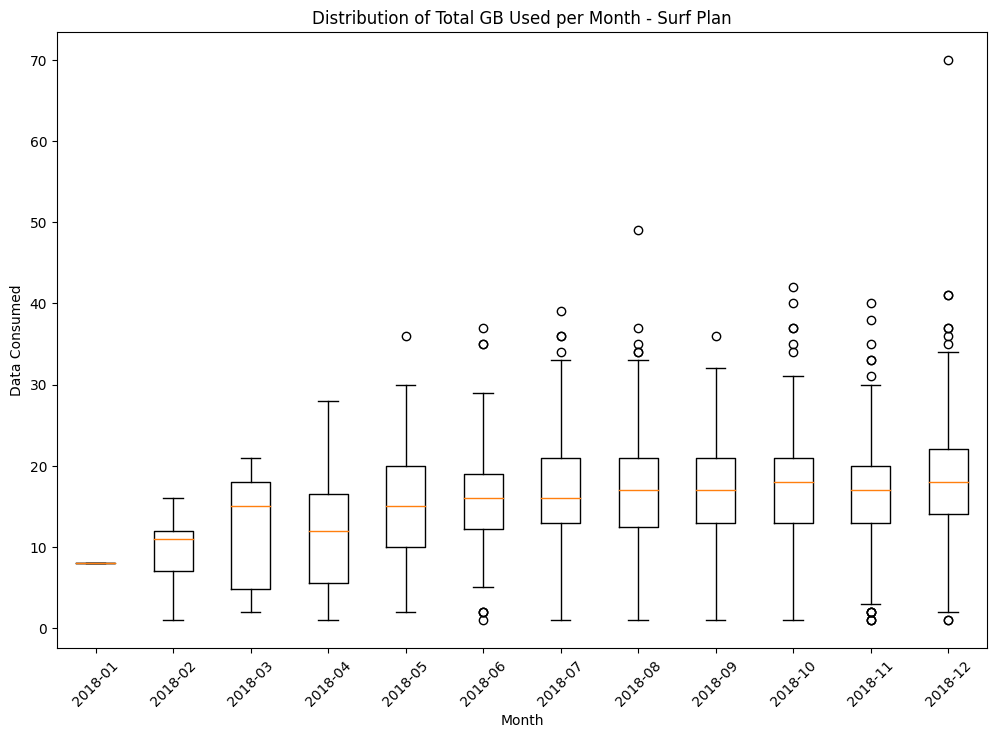

In [43]:
surf_users = surf_users.copy()

# Convert call dates back to timestamps
surf_users['session_date'] = surf_users['session_date'].dt.to_timestamp()

# Convert and ensure 'session_date' is in proper format
surf_users['session_date'] = pd.to_datetime(surf_users['session_date'])
surf_users['month'] = surf_users['session_date'].dt.to_period('M')

# Filter out any NaT or non-applicable values
surf_users = surf_users.dropna(subset=['month'])

# Prepare data for each month, ensuring order
months = sorted(surf_users['month'].unique())
monthly_data = [surf_users[surf_users['month'] == month]['total_gb_used'] for month in months]

plt.figure(figsize=(12, 8))

# Create the boxplot
plt.boxplot(monthly_data, labels=[str(month) for month in months])
plt.title('Distribution of Total GB Used per Month - Surf Plan')
plt.xlabel('Month')
plt.ylabel('Data Consumed')
plt.xticks(rotation=45)
plt.show()


## Revenue

session_date
2018-01-01       20.00
2018-02-01      119.57
2018-03-01      616.65
2018-04-01     1420.70
2018-05-01     2695.43
2018-06-01     3645.67
2018-07-01     5500.77
2018-08-01     7661.59
2018-09-01     8407.94
2018-10-01    11831.67
2018-11-01    12451.42
2018-12-01    16919.28
Name: monthly_revenue, dtype: float64
session_date
2018-01-01     210.0
2018-02-01     350.0
2018-03-01     546.0
2018-04-01    1169.0
2018-05-01    1491.0
2018-06-01    2667.0
2018-07-01    3402.0
2018-08-01    4130.0
2018-09-01    5068.0
2018-10-01    6349.0
2018-11-01    7357.0
2018-12-01    9093.0
Name: monthly_revenue, dtype: float64


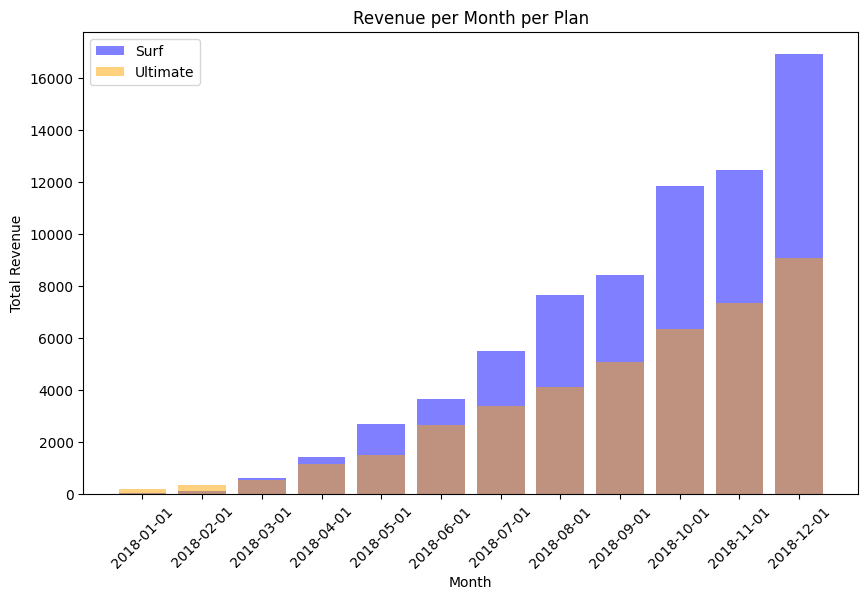

In [44]:
print(surf_users.groupby('session_date')['monthly_revenue'].sum())
print(ultimate_users.groupby('session_date')['monthly_revenue'].sum())
# Filter by day
surf_month_rev = surf_users.groupby('session_date')['monthly_revenue'].sum()
ult_month_rev = ultimate_users.groupby('session_date')['monthly_revenue'].sum()

plt.figure(figsize=(10, 6))

# Convert index to string to get proper x-ticks
months = surf_month_rev.index.astype(str)

# Bar plot for Surf
plt.bar(months, surf_month_rev, alpha=0.5, label='Surf', color='blue')
# Bar plot for Ultimate
plt.bar(months, ult_month_rev, alpha=0.5, label='Ultimate', color='orange')

plt.title('Revenue per Month per Plan')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.show()


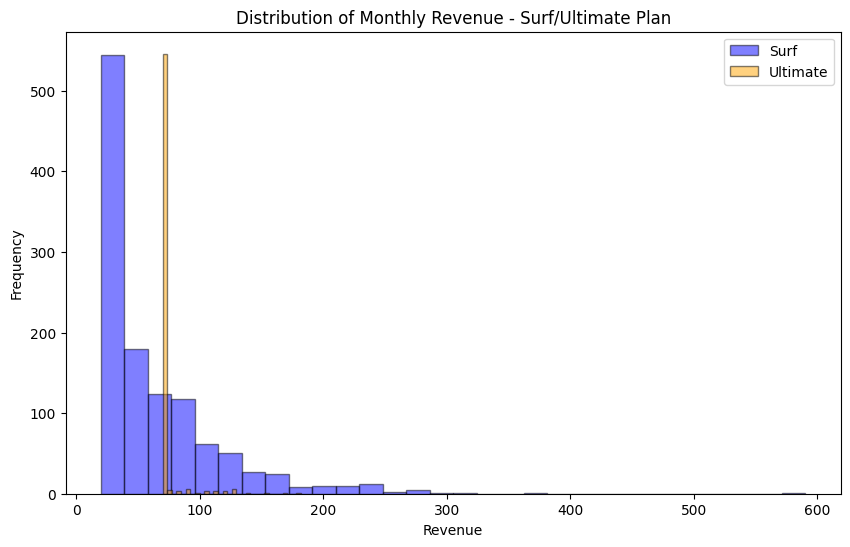

In [45]:
# Compare the number of messages users of each plan require each month. Plot a histogram.

plt.figure(figsize=(10, 6))

# Plot histogram for surf_users
plt.hist(surf_users['monthly_revenue'], bins=30, alpha=0.5, label='Surf', color='blue', edgecolor='black')
plt.hist(ultimate_users['monthly_revenue'],bins=30, alpha=0.5, label='Ultimate', color='orange', edgecolor='black')
plt.title('Distribution of Monthly Revenue - Surf/Ultimate Plan')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [46]:
# Calculate the mean and the variance of the monthly call duration
mean_surf_rev = surf_users['monthly_revenue'].mean()
var_surf_rev = np.var(surf_users['monthly_revenue'])
mean_ult_rev = ultimate_users['monthly_revenue'].mean()
var_ult_rev = np.var(ultimate_users['monthly_revenue'])

print('Surf Users:')
print('mean:', mean_surf_rev)
print('variance:', var_surf_rev)
print('')
print('Ultimate Users:')
print('mean:', mean_ult_rev)
print('variance:', var_ult_rev)

Surf Users:
mean: 60.41583898305085
variance: 2870.068890567294

Ultimate Users:
mean: 72.24870466321244
variance: 121.5478178385102


## Test statistical hypotheses

- **Null Hypothesis:** The average revenue from users of the Ultimate and Surf calling plans are equal
- **Alternate Hypothesis:** The average revenue from users of the Ultimate and Surf calling plans differs
- **Statistical Test:** t-test (Hypothesis on the Equality of Two Population Means)		
- **Alpha Value:** 0.05 (5%)

In [47]:
# Test the hypotheses

# Use monthly revenue data
surf_revenue = surf_users.groupby('user_id')['monthly_revenue'].mean()
ultimate_revenue = ultimate_users.groupby('user_id')['monthly_revenue'].mean()

alpha = 0.05

# Perform the t-test
results = st.ttest_ind(surf_revenue, ultimate_revenue)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print("Don't reject null hypothesis")

p-value: 0.00011810799565817098
Reject the null hypothesis


- **Null Hypothesis:** The average revenue from users in the NY-NJ area is equal to that of the users from the other regions
- **Alternate Hypothesis:** The average revenue from users in the NY-NJ area is different from that of the users from the other regions
- **Statistical Test:** t-test (Hypothesis on the Equality of Two Population Means)		
- **Alpha Value:** 0.05 (5%)

In [48]:
# Combine surf_users and ultimate_users
combined_df = pd.concat([surf_users, ultimate_users], ignore_index=True)

# Merge with the users DataFrame to add city information
combined_with_city = pd.merge(combined_df, users[['user_id', 'city']], on='user_id', how='left')


# Continue with your existing process
target_df = combined_with_city[['user_id', 'city_y', 'monthly_revenue', 'session_date']]
NY_NJ_region = target_df.loc[target_df['city_y'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
other_regions = target_df.loc[target_df['city_y'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

mean_NY_NJ_region = NY_NJ_region.groupby('user_id')['monthly_revenue'].mean()
mean_other_regions = other_regions.groupby('user_id')['monthly_revenue'].mean()

alpha = 0.05

# Perform the t-test
results = st.ttest_ind(mean_NY_NJ_region, mean_other_regions)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print("Don't reject the null hypothesis")

p-value: 0.27969838562756416
Don't reject the null hypothesis


## General conclusion

Based from the number of graphs and tests done, it turns out that the Surf plan seems to bring in revenue due to a lot more individuals being on that type of plan. With the timeframe in mind, it looked like revenue increased throughout the year, especially around the holiday months. Also, looking at both the mean and variance for both types of users, the Ultimate plan had a higher mean than Surf. With respect to the Surf plan,the variance conveys that they're a lot more individuals around the mean of 60 (have a monthly bill of $60) than that of the Ultimate plan.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊